# Taller 1
# MINE4101
### Universida de los Andes
Rafael Camilo Tejón Rojas 201617853 rc.tejon@uniandes.edu.co

In [2]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=57f508fd235e59d7504aa67a19a81844eaec6c63b777211aeb1b9b3d9b34dffd
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import wget
import csv
import math
from cycler import cycler


# Descarga de a DB
wget.download('https://raw.githubusercontent.com/rctejon/spotify-singer-analysis/main/Data_Taller_1.csv')
plt.rcParams['figure.figsize'] = [15, 9]
sns.set(style="darkgrid")
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

#Punto 1
Describa el conjunto de datos, tipos de variables y destaque cualquier problema de calidad de datos y procesos de limpieza que deba implementar.

Los datos que se van a utilizar son los siguientes:

| nombre de dato   | Tipo de dato | Rango                 | Descripción                                                                                 |
|------------------|--------------|-----------------------|---------------------------------------------------------------------------------------------|
| artists          | String       |                       | Artista que produjo la canción                                                              |
| song             | String       |                       | Nombre de la canción                                                                        |
| duration_ms      | Integer      | > 0                   | Duración de la canción en ms                                                                |
| explicit         | Boolean      |                       | Si la cadena contiene contenido explicito o no                                              |
| year             | Integer      | > 0                   | Año de producción de la canción                                                             |
| popularity       | Integer      | 0 - 100               | Representa que tan popular es una canción                                                   |
| danceability     | Float        | 0 - 1                 | Representa con un porcentaje que tan bailable es una canción                                |
| energy           | Float        | 0 - 1                 | Representa con un porcentaje que tan intensa es una canción                                 |
| key              | Integer      | 0 - 11                | Representa en que llave esta compuesta la canción                                           |
| loudness         | Float        | -60 - 0 (Normalmente) | Decibelios maximos calculados                                                               |
| mode             | Integer      | 0 o 1                 | 0 representa modalidad Menor y 1 Mayor                                                      |
| speechiness      | Float        | 0 - 1                 | Representa con un porcentaje que tan probable es que se cante en una canción                |
| acousticness     | Float        | 0 - 1                 | Representa que tan probable es que una canción sea acústica                                 |
| instrumentalness | Float        | 0 - 1                 | Representa con un porcentaje que tan probables es que una canción sea instrumental          |
| liveness         | Float        | 0 - 1                 | Representa con un porcentaje que tan probables es que una canción sea una grabación en vivo |
| valence          | Float        | 0 - 1                 | Representa con un porcentaje la positividad de una canción                                  |
| tempo            | Float        | 50 - 150              | Representa el tempo de la canción                                                           |
| genre            | String       |                       | Generos de la canción separado por comas                                                    |

En cuanto a los problemas de calidad se encontraron los siguientes problemas.


*   Los campos genre y song podian contener comas lo que complicaba la lectura del CSV.
*   Existian filas del CSV que estaban rodeados por comillas.
*   Existian canciones que pertenecian a multiples generos y en este campo los generos se rodeaban por comillas y se seperaban por comas.
*   Existia el caso de "Tyler, The Creator" que era el unico artista que contenia 1 coma y por ese motivo se decidio corregir de manera manual.
*   Los datos de los generos no se encontraban normalizados y muchos campos hacian referencia al mismo genero de manera distinta.
* En multiples campos habian elementos nan.
* Existian duplicados.

En el codigo se explicara como se corregieron estos problemas.



In [5]:
# Primero se atenderan los problemas que impiden la lectura del CSV por Pandas
clean_data = []
# Se lee el archivo
with open('Data_Taller_1.csv', 'r') as data_file:
  lines = data_file.readlines()
  for line in lines:
    #Al final de cada linea hay un salto y ; los cuales no necesito para esta limpieza y por eso se quitan
    clean_text = line[:-2]
    # En el caso que la linea empiece con una comilla se que es un caso con comas en el interior y necesita un trato especial
    if line.startswith('"'):
      clean_text = ''
      # En este caso se quita la comilla inicial y las multiples comillas que tiene al final esta linea mas el salto de linea y el ;
      # Posteriormente se hace un split por comillas dobles debido a que esto es lo que separa las secciones que tienen comas en un campo
      sections = line[1:-5].split('""')
      #Si solo hay 2 elementos solo hay comas en el genero y solo se remplazas las comas de la segunda sección
      if len(sections) == 2:
        for i , section in enumerate(sections):
          temp = section
          if i == 1:
            temp = section.replace(',', '|')
          clean_text += temp
      else:
        # De lo contrario el nombre de la canción tambien tenia comas entonces se reemplazan las comas de las secciones que no inician por coma
        # Y que no sean la primera cancion, Esto es por que las doble comillas siempre estan a la izquierda de los casos que quiero cambiar y no
        #hay una coma entre ellos, ademas la primera seccion y se aseguro que no hay artistas que contangan comas
        for i , section in enumerate(sections):
          temp = section
          if not section.startswith(',') and i > 0:
            temp = section.replace(',', '|')
          clean_text += temp
    clean_list = clean_text.split(',')
    if len(clean_list) != 18:
      print(line, clean_text)
      print(len(clean_list), clean_list)
    #Se contruye un arreglo con las columnas limpias
    clean_data.append(clean_list)  


# Se crea el CSV que pandas si puede leer
with open('data_clean.csv', 'w') as clean_data_file:
  writer = csv.writer(clean_data_file)
  writer.writerows(clean_data)


In [6]:
spotify_df = pd.read_csv('data_clean.csv')

print(spotify_df.shape)
print(spotify_df.dtypes)
spotify_df.head()

(2000, 18)
artist               object
song                 object
duration_ms         float64
explicit             object
year                  int64
popularity          float64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock| pop
2,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop| country
3,Bon Jovi,It's My Life,224493.0,False,2000,78.0,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock| metal
4,*NSYNC,Bye Bye Bye,200560.0,False,2000,NaN,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [5]:
# Para continuar con la limpieza se pasaron todos las campos de texto a minusculas y sequitaron cualquier espacio que pueda tener
spotify_df['genre'] = spotify_df['genre'].str.lower()
spotify_df['genre'] = spotify_df['genre'].str.strip()
spotify_df['artist'] = spotify_df['artist'].str.lower()
spotify_df['artist'] = spotify_df['artist'].str.strip()
spotify_df['song'] = spotify_df['song'].str.lower()
spotify_df['song'] = spotify_df['song'].str.strip()

In [8]:
# Esta funcion devuelvo los generos unicos que existen en el dataset
def distinct_genres(genres):
  genre_set = set()
  for genre in genres:
    for g in genre[0]:
      genre_set.add(g)
  
  return sorted(list(genre_set), reverse = True)

#Esta funcion convierte el str x en una tupla donde cada elemento es un split por el |
def strip_tuple(x):
  l = x.split('|')
  for i, e in enumerate(l):
    l[i] = e.strip()
  return tuple(l)

# Se convierten todos los nan a string vacios debido a que se encuentran en campos textuales y complican algunos calculos
spotify_df.fillna('', inplace=True)
# Despues se normalizan todos los generos para que no haya varios casos haciendo referencia a lo mismo
spotify_df['genre'] = np.where(spotify_df['genre'] == 'dance/electron', 'dance/electronic', spotify_df['genre'])
spotify_df['genre'] = np.where(spotify_df['genre'] == 'hip h', 'hip hop', spotify_df['genre'])
spotify_df['genre'] = np.where(spotify_df['genre'] == 'p', 'pop', spotify_df['genre'])
spotify_df['genre'] = np.where(spotify_df['genre'] == 'po', 'pop', spotify_df['genre'])
spotify_df['genre'] = np.where(spotify_df['genre'] == 'set()', 'set', spotify_df['genre'])
spotify_df['genre'] = np.where(spotify_df['genre'] == 'ro', 'rock', spotify_df['genre'])
# Se combierten los generos en tuplas para que se puedan iterar facilmente
spotify_df['genre'] = spotify_df['genre'].apply(strip_tuple)

#Se calculan los generos unicos
genres = spotify_df.groupby('genre').genre.unique()
unique_genres = distinct_genres(genres)
unique_genres

['set',
 'rock',
 'pop',
 'metal',
 'latin',
 'jazz',
 'hip hop',
 'easy listening',
 'country',
 'classical',
 'blues',
 'World/Traditional',
 'R&B',
 'Folk/Acoustic',
 'Dance/Electronic',
 'Dance/Electron',
 '']

In [7]:
# Los casos que eran nan ahora son strings vacios y se convierten 0 (Est puede afectar algunos calculos pero eran tan pocos que se me hacia irrelevante quitarlos
# Siendo que pueden ser utiles para otros calculos que no tengan que ver con la duración)
spotify_df['duration_ms'] = np.where(spotify_df['duration_ms'] == '', 0.0, spotify_df['duration_ms'])

empty_duration = spotify_df[spotify_df['duration_ms'] == '']
empty_duration

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre


In [12]:
# Lo mismo que con la duración
spotify_df['popularity'] = np.where(spotify_df['popularity'] == '', 0, spotify_df['popularity'])

empty_duration = spotify_df[spotify_df['popularity'] == '']
empty_duration

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre


In [10]:
#En este caso se puso 0.5 debido a que no existen elementos con valencia 0 y dañaba unos graficos de cajas
spotify_df['valence'] = np.where(spotify_df['valence'] == '', 0.5, spotify_df['valence'])

empty_duration = spotify_df[spotify_df['valence'] == '']
empty_duration

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre


In [11]:
#Lo mismo que con la valencia pero en este caso con el elemento minimo que puede tomar el tempo
spotify_df['tempo'] = np.where(spotify_df['tempo'] == '', 100, spotify_df['tempo'])

empty_duration = spotify_df[spotify_df['tempo'] == '']
empty_duration

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre


In [9]:
# Se eliminaron canciones duplicadas, se uso artista y cancion debido a que puedene existir canciones con el mismo nombre pero de diferentes artistas
spotify_df.drop_duplicates(subset=['artist','song'])

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.3,0.000018,0.3550,0.894,95.053,"(pop,)"
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.0,0.6120,0.684,148.726,"(rock, pop)"
2,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.029,0.173,0.0,0.2510,0.278,136.859,"(pop, country)"
3,Bon Jovi,It's My Life,224493.0,False,2000,78.0,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"(rock, metal)"
4,*NSYNC,Bye Bye Bye,200560.0,False,2000,,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.00104,0.0845,0.879,172.656,"(pop,)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026.0,False,2019,79.0,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.0,0.1060,0.952,137.958,"(pop,)"
1996,Taylor Swift,Cruel Summer,178426.0,False,2019,78.0,0.552,0.702,9,-5.707,1,0.157,0.117,0.000021,0.1050,0.564,169.994,"(pop,)"
1997,Blanco Brown,The Git Up,200593.0,False,2019,69.0,0.847,0.678,9,-8.635,1,0.109,0.0669,0.0,0.2740,0.811,,"(hip hop, country)"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029.0,False,2019,75.0,0.741,0.520,8,-7.513,1,0.0656,0.45,0.000002,0.2220,0.347,102.998,"(pop,)"


#Punto 2

¿Cuál es el top 10 de artistas más activos de los últimos 10 años?


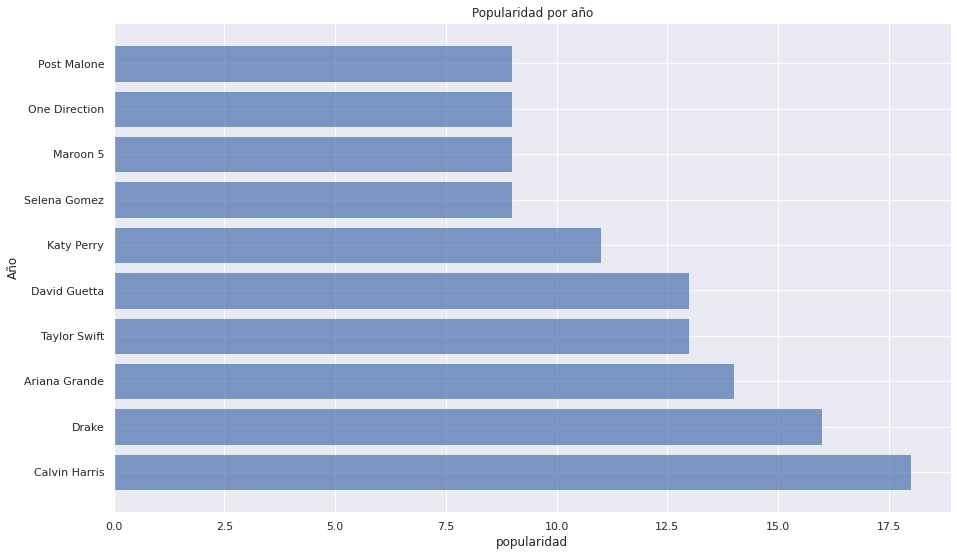

artist
Calvin Harris    18
Drake            16
Ariana Grande    14
Taylor Swift     13
David Guetta     13
Katy Perry       11
Selena Gomez      9
Maroon 5          9
One Direction     9
Post Malone       9
Name: song, dtype: int64

In [13]:
# Primero se filtraron las canciones posteriores a 2012 que son los ultimos 10 años desde 2022 
# (se escogio esta definición debido a que no es claro si son los ultimos 10 años del database o desde que se hizo este taller)
songs_last_10_years = spotify_df[spotify_df['year'] >= 2012]
# Despues se agrupo por cantante, se contaron las canciones y se organizaron por el numero de canciones
# que es lo que se definio como actuvidad del cantante
songs_per_artist = songs_last_10_years.groupby(['artist'])['song'].count().sort_values(ascending = False)
# Se sacaron el top 10 de los artistas con mas canciones
top_10_artist = songs_per_artist.nlargest(10)

# Se grafica el top en un diagrama de barras
y_pos = np.arange(len(top_10_artist.index))
plt.barh(y_pos, top_10_artist.values, align='center', alpha=0.7)
plt.yticks(y_pos, top_10_artist.index)
plt.xlabel('popularidad')
plt.ylabel('Año')
plt.title('Popularidad por año')

plt.show()
songs_per_artist.head(10)

En el gráfico anterior se puede observar el top 10 de los artistas más activos. Activo según la definición de los cantantes que más canciones sacaron. Aquí se puede ver que el mínimo de canciones para entrar al top es de 9 canciones y el artista con más canciones es Calvin Harris con 18 canciones.

#Punto 3

¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con su duración? Halle la diferencia del tiempo promedio de ambos géneros.

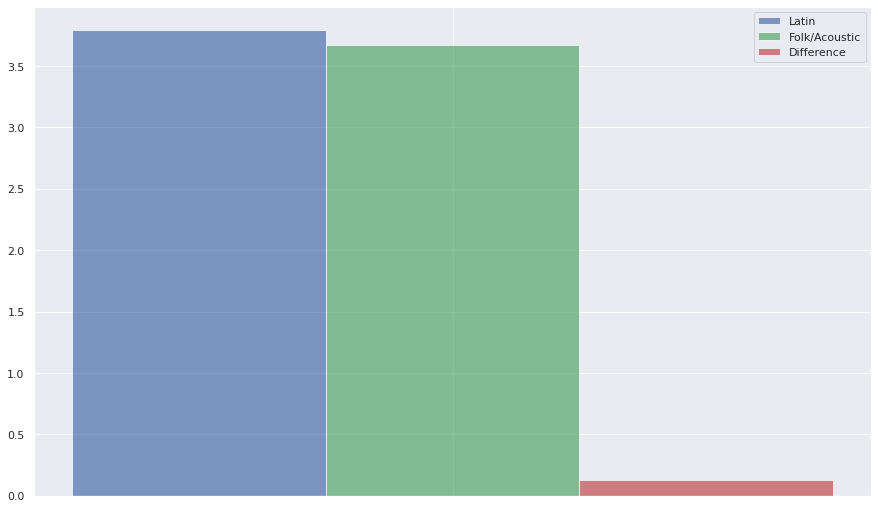

Latin 3.7945809895833333 min
Folk/Acoustic 3.6697275 min
Difference 0.12485348958333331 min


In [13]:
sum_per_genre = spotify_df.groupby('genre').duration_ms.sum()
counts_per_genre = spotify_df.groupby('genre').duration_ms.count()
sum_folk = 0
count_folk = 0
sum_latin = 0
count_latin = 0
for genre_tuple in sum_per_genre.iteritems():
  if('folk/acoustic' in genre_tuple[0]):
    sum_folk += genre_tuple[1]
    count_folk += counts_per_genre[genre_tuple[0]]
  if('latin' in genre_tuple[0]):
    sum_latin += genre_tuple[1]
    count_latin += counts_per_genre[genre_tuple[0]]
avg_folk = (sum_folk / count_folk) / 60000
avg_latin = (sum_latin / count_latin) / 60000

data = {'Latin' : [avg_latin], 'Folk/Acoustic' : [avg_folk], 'Difference' : [avg_latin - avg_folk]}
n_bars = len(data)
bar_width = .8 / n_bars
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
bars = []

for i, (name, values) in enumerate(data.items()):
  x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
  for x, y in enumerate(values):
    bar = plt.bar(x + x_offset, y, width=bar_width, alpha=0.7, color=colors[i % len(colors)])
  bars.append(bar[0])

x_pos = np.arange(1)
plt.xticks(x_pos, [''])

plt.legend(bars, data.keys())
plt.show()

print('Latin',avg_latin, 'min')
print('Folk/Acoustic',avg_folk, 'min')
print('Difference',(avg_latin - avg_folk), 'min')

En el grafico se puede observar que tanto como las canciones de genero latino como las de folk tienen duraciones similares y unicamente se diferencian por unos 7,2 segundos



#Punto 4
Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019?

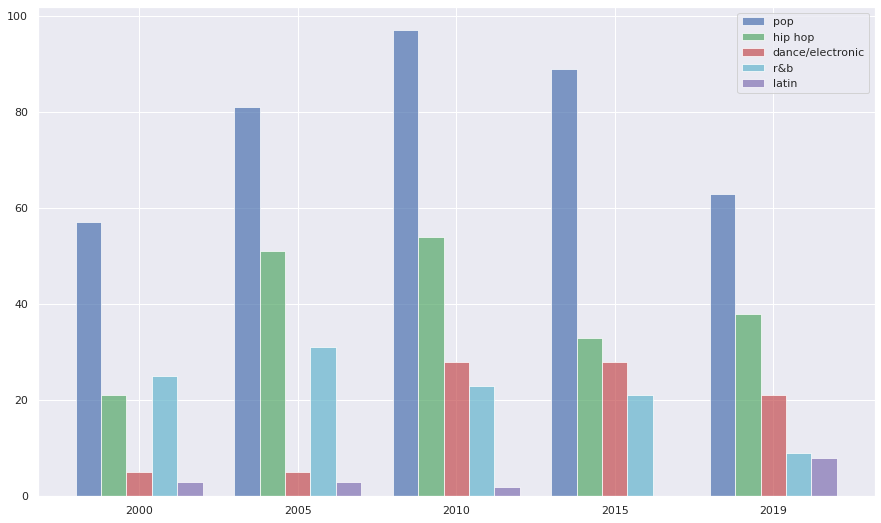

In [14]:
def top_per_genre(year):
  songs_year = spotify_df[spotify_df['year'] == year]
  songs_per_genre_year = songs_year.groupby('genre')['song'].count().sort_values(ascending = False)
  top_year = {}
  for genre in unique_genres:
    top_year[genre] = 0
  for genre_tuple in songs_per_genre_year.iteritems():
    for genre in genre_tuple[0]:
      top_year[genre] += genre_tuple[1]
  sorted_top = {k: v for k, v in sorted(top_year.items(), key=lambda item: -item[1])}
  return sorted_top

data = {}
top_2019 = top_per_genre(2019)
i = 0
for genre, value in top_2019.items():
  if i == 5:
    break
  data[genre] = []
  i += 1

top_2000 = top_per_genre(2000)
top_2005 = top_per_genre(2005)
top_2010 = top_per_genre(2010)
top_2015 = top_per_genre(2015)

for genre in data.keys():
  data[genre].append(top_2000[genre])
  data[genre].append(top_2005[genre])
  data[genre].append(top_2010[genre])
  data[genre].append(top_2015[genre])
  data[genre].append(top_2019[genre])

n_bars = len(data)
bar_width = .8 / n_bars
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
bars = []

for i, (name, values) in enumerate(data.items()):
  x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
  for x, y in enumerate(values):
    bar = plt.bar(x + x_offset, y, width=bar_width, alpha=0.7, color=colors[i % len(colors)])
  bars.append(bar[0])

x_pos = np.arange(5)
plt.xticks(x_pos, [2000, 2005, 2010, 2015, 2019])

plt.legend(bars, data.keys())
plt.show()

pop [57, 81, 97, 89, 63]
hip hop [21, 51, 54, 33, 38]
dance/electronic [5, 5, 28, 28, 21]
r&b [25, 31, 23, 21, 9]
latin [3, 3, 2, 0, 8]


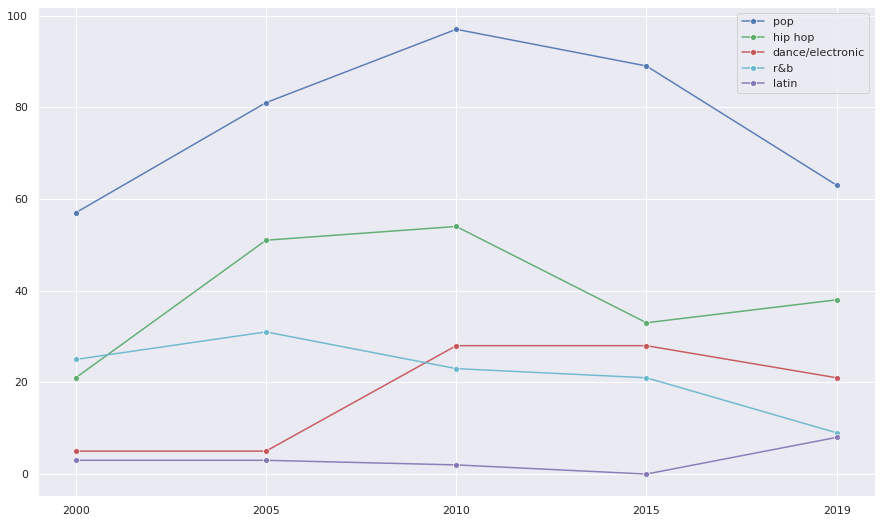

In [15]:
def top_per_genre(year):
  songs_year = spotify_df[spotify_df['year'] == year]
  songs_per_genre_year = songs_year.groupby('genre')['song'].count().sort_values(ascending = False)
  top_year = {}
  for genre in unique_genres:
    top_year[genre] = 0
  for genre_tuple in songs_per_genre_year.iteritems():
    for genre in genre_tuple[0]:
      top_year[genre] += genre_tuple[1]
  sorted_top = {k: v for k, v in sorted(top_year.items(), key=lambda item: -item[1])}
  return sorted_top

data = {}
top_2019 = top_per_genre(2019)
i = 0
for genre, value in top_2019.items():
  if i == 5:
    break
  data[genre] = []
  i += 1

top_2000 = top_per_genre(2000)
top_2005 = top_per_genre(2005)
top_2010 = top_per_genre(2010)
top_2015 = top_per_genre(2015)

for genre in data.keys():
  data[genre].append(top_2000[genre])
  data[genre].append(top_2005[genre])
  data[genre].append(top_2010[genre])
  data[genre].append(top_2015[genre])
  data[genre].append(top_2019[genre])

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (name, values) in enumerate(data.items()):
  print(name, values)
  sns.lineplot(x=['2000', '2005', '2010', '2015', '2019'], y=values, alpha=0.9, color=colors[i % len(colors)], marker='o')

x_pos = np.arange(5)
plt.xticks(x_pos, ['2000', '2005', '2010', '2015', '2019'])

plt.legend(data.keys())

plt.show()

En el 2019 el top era pop, hip hop, dance, r&b y latin. En general no se observan cambios muy notorios puesto que pop fue el genero mas popular todos los años, algunas cosas a resaltar son la ausencia del rock en el top 5 que fue superada por la musica latina en 2019 (Los demas años si entraba en el top). Por ultimo Se puede observar que los crecimientos mas notorios son los del hip hop y el dance y el decrecimiento mas notorio fue el del r&b.


# Punto 5
¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.

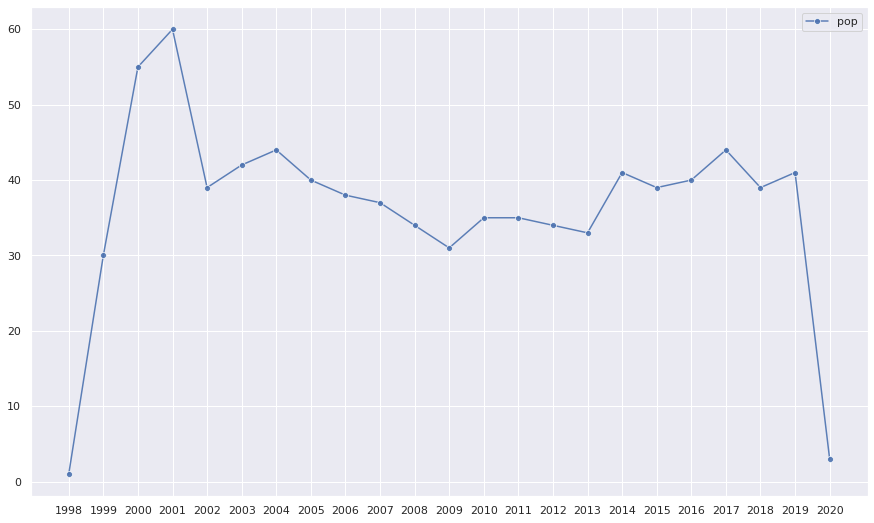

In [16]:
artist_first_year = spotify_df.groupby('artist').year.agg('min')
new_artist_per_year = artist_first_year.groupby(lambda x: artist_first_year[x]).count()
new_artist_per_year

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
years = [str(year) for year in new_artist_per_year.index]
sns.lineplot(x=years, y=new_artist_per_year.values, alpha=0.9, color=colors[0], marker = 'o')

x_pos = np.arange(len(years))
plt.xticks(x_pos, years)

plt.legend(data.keys())
plt.show()

En este grafico podemos observar que casi todos los años la cantidad de nuevos artistas era muy similar entre unos 30-40 nuevos artistas por año, aunque unos casos a tomar en cuenta son los años extremos (1998 y 2020) que tienen muy pocos artistas nuevos, aunque esto debe ser debido a que se guardaron menos casos de estos años, por otro lado tambien existe el caso de los años 1999 y 2000 en el cual hubo un boom de nuevos artistas casi duplicando el promedio de los otros años.


# Punto 6
Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre la gráfica, ej: ¿existen tendencias?

{'world/traditional': [0, 0, 69.0, 0, 0, 61.0, 120.0, 135.0, 96.0, 0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 57.0], 'set': [0, 71.0, 0, 0, 66.0, 0, 214.0, 46.0, 17.0, 114.0, 0, 122.0, 0, 57.0, 83.0, 74.0, 219.0, 0, 57.0, 0, 67.0, 57.0, 0], 'rock': [0, 554.0, 795.0, 932.0, 978.0, 808.0, 675.0, 1242.0, 950.0, 1304.0, 957.0, 560.0, 275.0, 809.0, 732.0, 542.0, 440.0, 879.0, 326.0, 265.0, 610.0, 65.0, 0], 'r&b': [49.0, 512.0, 1385.0, 2175.0, 1794.0, 2033.0, 1847.0, 1679.0, 1753.0, 2098.0, 2172.0, 1275.0, 1352.0, 1070.0, 615.0, 458.0, 560.0, 1230.0, 1101.0, 143.0, 742.0, 491.0, 0], 'pop': [49.0, 1830.0, 3187.0, 5361.0, 4512.0, 4616.0, 3735.0, 4869.0, 4185.0, 4145.0, 5238.0, 4192.0, 5973.0, 4960.0, 6319.0, 3898.0, 5858.0, 5068.0, 4620.0, 4862.0, 5260.0, 3779.0, 73.0], 'metal': [0, 204.0, 577.0, 529.0, 356.0, 855.0, 60.0, 347.0, 65.0, 447.0, 398.0, 143.0, 0, 141.0, 125.0, 0, 0, 130.0, 45.0, 0, 0, 65.0, 0], 'latin': [0, 176.0, 62.0, 194.0, 0, 183.0, 81.0, 158.0, 242.0, 102.0, 52.0, 190.0, 126.0,

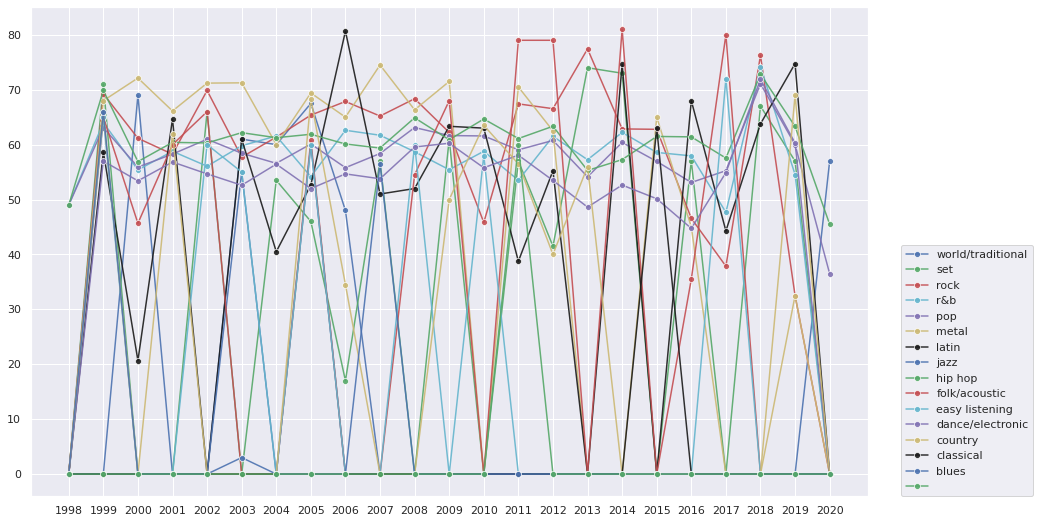

In [41]:
popularity_sum_per_year_genre = spotify_df.groupby(['year', 'genre']).popularity.sum()
popularity_count_per_year_genre = spotify_df.groupby(['year', 'genre']).popularity.count()

data = {}
data_sum = {}
data_count = {}

num = 2021 - 1998

for genre in unique_genres:
  data[genre] = [0] * num
  data_sum[genre] = [0] * num
  data_count[genre] = [0] * num

for ind in popularity_sum_per_year_genre.index:
  for genre in ind[1]:
    data_sum[genre][ind[0]-1998] += popularity_sum_per_year_genre[ind]
    data_count[genre][ind[0]-1998] += popularity_count_per_year_genre[ind]

print(data_sum)
print(data_count)

for k, v in data.items():
  for i in range(len(v)):
    data[k][i] = 0
    if data_count[k][i] > 0:
      data[k][i] = data_sum[k][i] / data_count[k][i]
print(data)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (name, values) in enumerate(data.items()):
  sns.lineplot(x=[str(year) for year in range(1998, 2021)], y=values, alpha=0.9, color=colors[i % len(colors)], marker='o')

x_pos = np.arange(2021-1998)
plt.xticks(x_pos, [str(year) for year in range(1998, 2021)])

plt.legend(data.keys(), loc=(1.04, 0))

plt.show()


En el grafico no se pueden concluir que haya ninguna tendencia significativa, aunque si se pudiera concluir algo es que la musica metal y rock a pesar de ser menos canciones, suelen tener mas popularidad que canciones que se producen mas como las pop o las de hip hop

# Punto 7
Compare los géneros Pop y Rock según sus características de: energy, valence y tempo. Concluya sobre su análisis.

In [18]:
def compare_box_plot(genre1, genre2, attribute, lower, upper):
  genre_groups = spotify_df.groupby('genre')
  energy_serie = genre_groups[attribute]
  genre1_energy = []
  genre2_energy = []
  for group in energy_serie:
    if genre1 in group[0]:
      genre1_energy += (group[1].tolist())
    if genre2 in group[0]:
      genre2_energy += (group[1].tolist())

  plt.xticks([1, 2], [genre1, genre2])
  plt.ylim(lower, upper)
  plt.boxplot([genre1_energy, genre2_energy])

In [19]:
def compare_density(genre1, genre2, attribute, lower, upper):
  genre_groups = spotify_df.groupby('genre')
  energy_serie = genre_groups[attribute]
  genre1_energy = []
  genre2_energy = []
  for group in energy_serie:
    if genre1 in group[0]:
      genre1_energy += (group[1].tolist())
    if genre2 in group[0]:
      genre2_energy += (group[1].tolist())

  plt.xlim(lower, upper)
  sns.histplot(data=genre1_energy, color="red", label=genre1, kde=True)
  sns.histplot(data=genre2_energy, color="skyblue", label=genre2, kde=True)

  plt.legend() 
  plt.show()

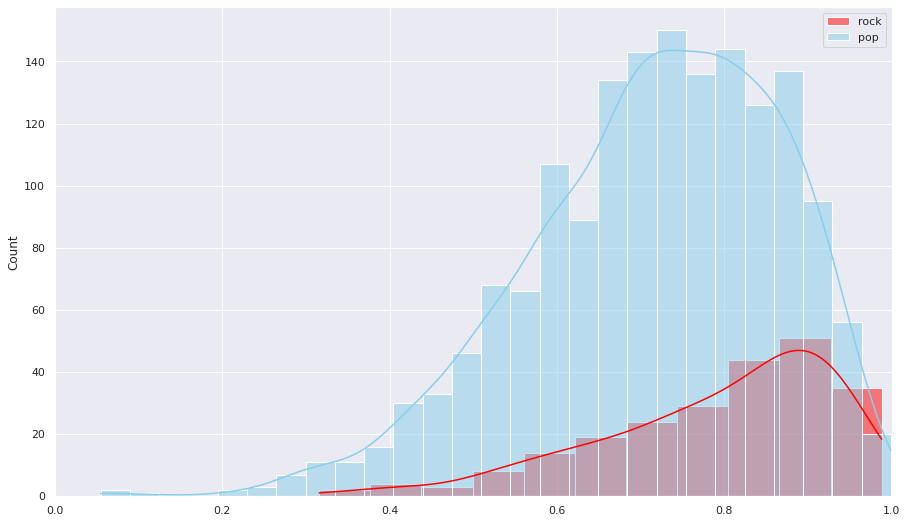

In [20]:
compare_density('rock', 'pop', 'energy', 0, 1)

En estos graficos la altura de los modelos tiene que ver con la cantidad de canciones y por eso las barras del pop son mucho mas altas que las del rock, a parte de esto se puede observar que tienen distribuciones similares aunque el rock esta un poco mas tendido hacia la drecha con un maximo en la energia alrededor de 0.9 y el pop mas a la izquiera con un maximo alrededor de 0.7

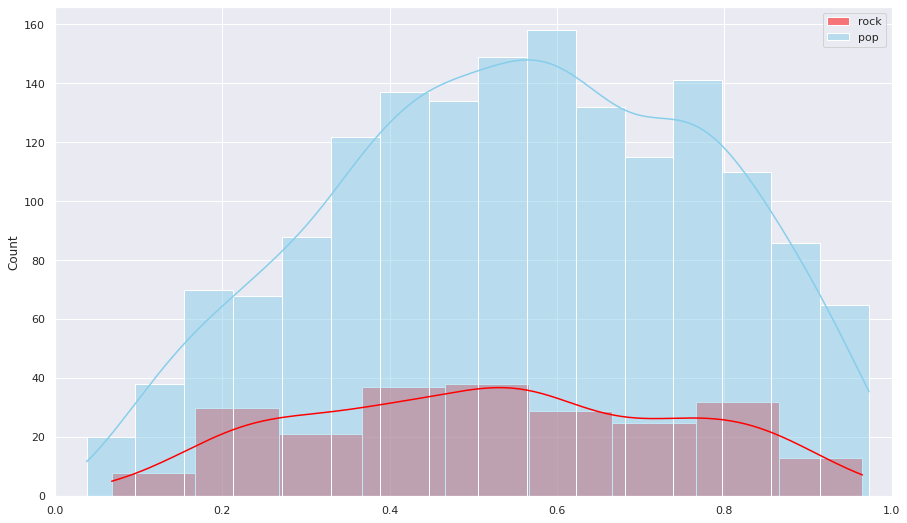

In [21]:
compare_density('rock', 'pop', 'valence', 0, 1)

De la misma forma que en el grafico anterior, sino contamos la cantidad de canciones la distribución de la valencia es muy similar con maximos alrededor 0.5 para el rock y 0.6 para el pop en cuanto a la valencia.

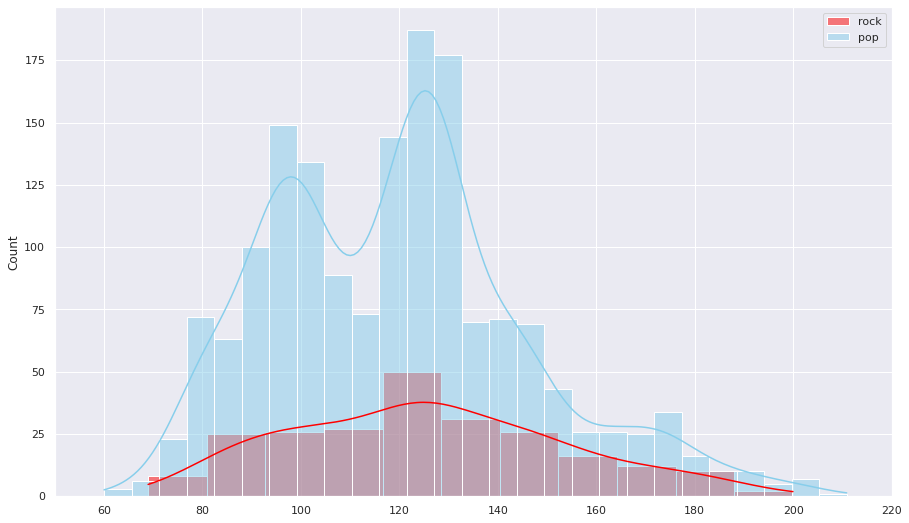

In [22]:
compare_density('rock', 'pop', 'tempo', 50, 220)

En este histograma si existe información chevere a tomar en cuenta, por ejemplo el pop tiene 2 puntos de alta concentración de tempos uno alrededor de 100 y otro akrededo de 120, por otro lado el rock solo tiene un maximo alrededor de 120

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


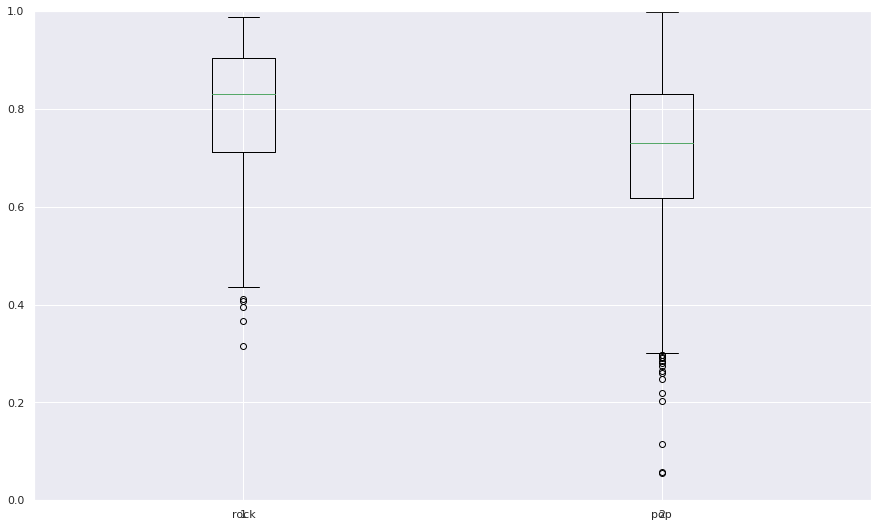

In [23]:
compare_box_plot('rock', 'pop', 'energy', 0, 1)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


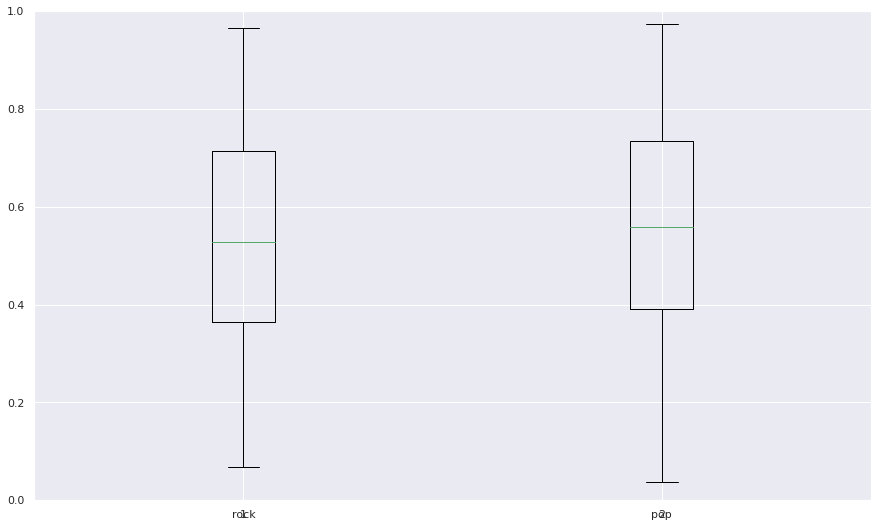

In [24]:
compare_box_plot('rock', 'pop', 'valence', 0, 1)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


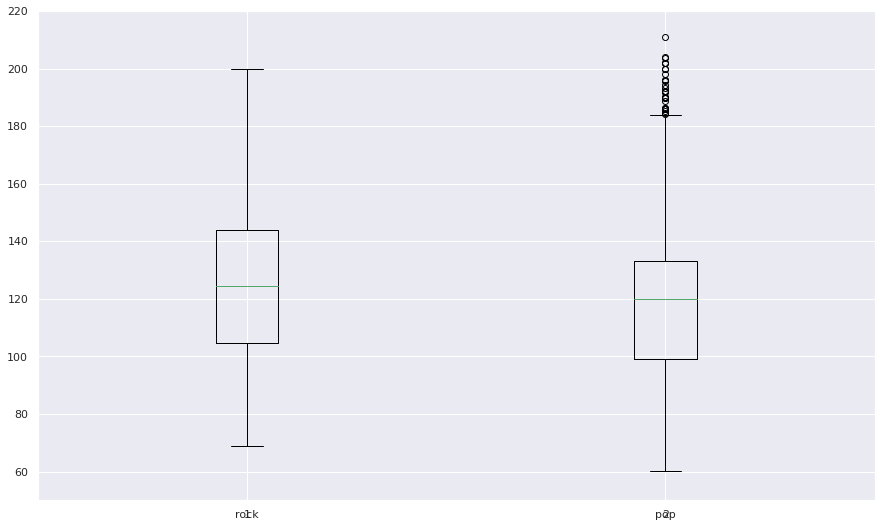

In [25]:
compare_box_plot('rock', 'pop', 'tempo', 50, 220)

Se decidio hacer graficos diferentes debido a que un solo grafico no mostraba todo lo que se puede sacar de la informción de la energia, valencia y tempo. Un ejemplo de esto son los graficos de caja, que para todos los casos el pop y el rock son muy similares, en cambio de los histogramas pubimos concluir que las canciones de rock suelen ser mas energicas que las de rock. Que las canciones de pop y rock tienen valencias similares y  por ultimo que muchas canciones de pop usan un tempo de 100 y 120 y el rock suelo usar tempos de alrededor de 120.

# Punto 8
Existe una relación entre la popularidad de las canciones explicitas y no explicitas y evalue si existe un cambio de la percepción de esto en el tiempo durante este milenio?

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='year') Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='year')


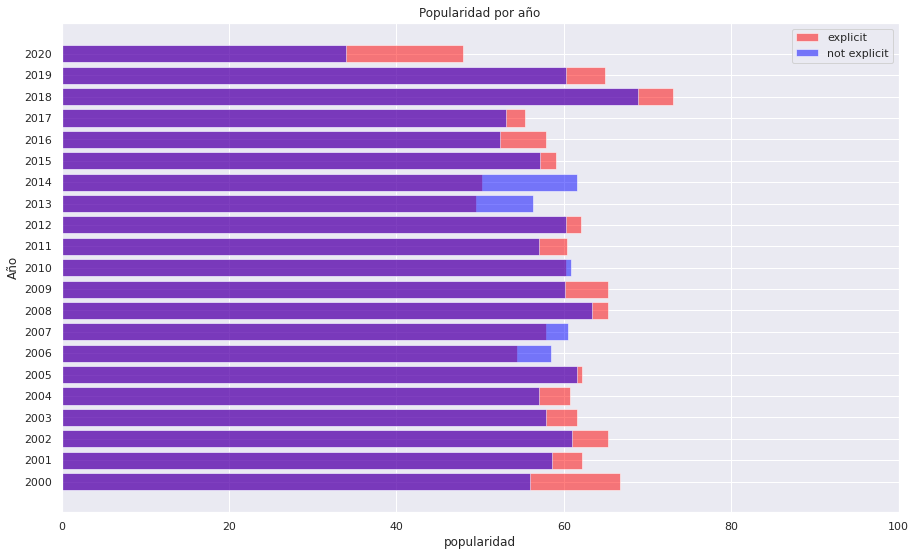

In [26]:
song_new_millenium = spotify_df[spotify_df['year'] >= 2000]
explicit_songs = song_new_millenium[song_new_millenium['explicit']==True]
not_explicit_songs = song_new_millenium[song_new_millenium['explicit']==False]

popularity_average_per_year_explicit = explicit_songs.groupby('year').popularity.mean()
popularity_average_per_year_not_explicit = not_explicit_songs.groupby('year').popularity.mean()


plt.xlim(0, 100)

y_pos = np.arange(len(popularity_average_per_year_explicit.index))
print(popularity_average_per_year_explicit.index, popularity_average_per_year_not_explicit.index)
plt.barh(y_pos, popularity_average_per_year_explicit.values, align='center', alpha=0.5, label='explicit', color='red')
plt.barh(y_pos, popularity_average_per_year_not_explicit.values, align='center', alpha=0.5, label='not explicit', color='blue')

plt.yticks(y_pos, popularity_average_per_year_explicit.index)
plt.xlabel('popularidad')
plt.ylabel('Año')
plt.title('Popularidad por año')
plt.legend() 


plt.show()


De esta grafico se puede concluir que la mayoria de los años las canciones explicitas son mas populares que las no implicitasm aunque entre los años 2005 y 2015 hubo una disminución notoriad de la diferencia entre la popularidad de las canciones explicitas y no expliciatas, una posible explicación es que a inicios de milenio el hip hop (Que son canciones que suelen ser explicitas) estaban pasando un poco de esa moda que tuvieron en los años 90 y posterior al año 2015 la musica latina (Especificamente el reggaeton que es musica en su mayoria explicita) tuvieron un boom en su popularidad que se mantiene hasta este año.